In [2]:
import pandas as pd
import numpy as np

# 1. 데이터 불러오기 & 데이터타입 통일

1) sal_prd_hist
2) vgn_prd

In [3]:
sal_prd_hist = pd.read_csv("C:/Users/amore/Desktop/vegan/data/SAL_PRD_HIST.csv")
vgn_prd = pd.read_csv("C:/Users/amore/Desktop/vegan/data/vgn_prd.csv", dtype={'PRD_CD':'int64'})

C:\Users\amore\AppData\Local\Temp\ipykernel_17340\494698804.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  sal_prd_hist = pd.read_csv("C:/Users/amore/Desktop/vegan/data/SAL_PRD_HIST.csv")


In [4]:
sal_prd_hist

,STND_YMD,INCS_NO,PRD_CD,PRD_DC_AMT,SAL_QTY,NET_PRD_SAL_AMT,SAL_UTPR
0,2018-12-06,e36ea03090a4e25fb4cf70396d64ba8320e3ef33828a29...,180040001,3115.0,1,3785.0,6900
1,2018-12-06,e36ea03090a4e25fb4cf70396d64ba8320e3ef33828a29...,111270252,250.0,2,1750.0,1000
2,2018-12-06,df161320881063fa0a29f3624cad69cc45d6746da0e5fa...,111650408,60.0,1,1940.0,2000
3,2018-12-06,fa5711af01c158fe15b78392f9c8b35e9385825430a9e4...,110651103,0.0,1,1500.0,1500
4,2018-12-06,757bfb545194a70f559f3f89363a88fd0d43ff4b4b2952...,111820038,0.0,1,1500.0,1500
...,...,...,...,...,...,...,...
9250044,2024-04-23,a8d56b36df3bc10349279e2326d5c61f30f7e75cc0b691...,111292309,3986.0,1,8914.0,12900
9250045,2024-04-23,a8d56b36df3bc10349279e2326d5c61f30f7e75cc0b691...,111651399,9094.0,1,18906.0,28000
9250046,2024-04-23,27cfdc04641ba1650307aef1d2ac968075154941ae1ebe...,111651399,7000.0,1,21000.0,28000
9250047,2024-04-23,f5072bb7791686b4c27607648da30d0404297f4701917f...,210000010,0.0,1,3900.0,3900


In [4]:
vgn_prd

,Unnamed: 0,PRD_CD,PRD_NM,vgn_bgn_dttm,vgn_end_dttm
0,0,202100018,프로젝트아모레 퍼즐우드 핸드크림 50ml,2022-07-04,2024-05-31
1,1,110770261,바이탈뷰티 메타그린 슬림 30일,2020-02-10,2025-02-09
2,2,110770572,바이탈뷰티 메타그린 슬림 14일(디자인),2020-02-10,2025-02-09
3,3,110770546,바이탈뷰티 메타그린 슬림 60일 기획세트,2020-02-10,2025-02-09
4,4,110770546,바이탈뷰티 메타그린 슬림 60일 기획세트,2020-02-10,2025-02-09
...,...,...,...,...,...
505,505,111413945,려 본초진 탈모증상완화 샴푸353ML(GEC(22,2022-07-21,2023-07-20
506,506,111040021,롱테이크 샌달우드 인텐시브 바디로션 200ML,2022-07-21,2023-07-20
507,507,111040022,롱테이크 블랙티앤피그 소프트닝 바디로션 200ML,2022-07-21,2023-07-20
508,508,110980001,이너프 프로젝트 클렌징 오일 150ML(쿠팡) (착인),2022-07-21,2023-07-20


In [5]:
sal_prd_hist['PRD_CD'] = sal_prd_hist['PRD_CD'].astype(str)

In [6]:
vgn_prd['PRD_CD'] = vgn_prd['PRD_CD'].astype(str)

# 2. DF 만들기

columns

- 제품: PRD_CD
- 시간(일): STND_YMD
- 고객 번호: INCS_NO
- 매출1: NET_PRD_SAL_AMT
- 매출2: SAL_STPR
- post: 비건 유효기간 안에 있으면 (1)


- group: 평생 비건 인증 한번이라도 받음(1) => X

1. df 만들기: 제품, 시간, 고객번호, 매출1, 매출2 // 시작일, 끝난일

 - vgn_bgn_dttm: 비건 시작 일
 - vgn_end_dttm: 비건 끝난 일

In [7]:
df = pd.merge(sal_prd_hist[['PRD_CD', 'INCS_NO', 'STND_YMD', 'NET_PRD_SAL_AMT','SAL_UTPR']],
              vgn_prd[['PRD_CD', 'vgn_bgn_dttm', 'vgn_end_dttm']],
              on='PRD_CD', how='inner')
df

,PRD_CD,INCS_NO,STND_YMD,NET_PRD_SAL_AMT,SAL_UTPR,vgn_bgn_dttm,vgn_end_dttm
0,111650344,df161320881063fa0a29f3624cad69cc45d6746da0e5fa...,2018-12-06,32000.0,32000,2021-04-12,2023-04-11
1,111650344,df161320881063fa0a29f3624cad69cc45d6746da0e5fa...,2018-12-06,32000.0,32000,2021-04-12,2023-04-11
2,111650344,77cbb1df31b4da9fb17a180aea1d23136db4fe31f10870...,2018-12-06,19000.0,32000,2021-04-12,2023-04-11
3,111650344,14cb36a801887d044ae656d130332ca0738e7221437fff...,2018-12-06,21956.0,32000,2021-04-12,2023-04-11
4,111650344,73fcfb6e42003be3851d890348dfbbec6394798b9c8d2c...,2018-12-06,26006.0,32000,2021-04-12,2023-04-11
...,...,...,...,...,...,...,...
1374728,110771139,8d5c65ad8243f3cd5ae6ea7b1657f0f43494def9ff83b9...,2024-04-14,19000.0,19000,2022-05-28,2024-05-27
1374729,110771139,8d5c65ad8243f3cd5ae6ea7b1657f0f43494def9ff83b9...,2024-04-14,19000.0,19000,2022-05-28,2024-05-27
1374730,110771139,8d5c65ad8243f3cd5ae6ea7b1657f0f43494def9ff83b9...,2024-04-14,19000.0,19000,2022-05-28,2024-05-27
1374731,110771139,8d5c65ad8243f3cd5ae6ea7b1657f0f43494def9ff83b9...,2024-04-14,19000.0,19000,2022-05-28,2024-05-27


In [ ]:
print(df['INCS_NO'][1374732])  # 행_인덱스에 원하는 행 번호를 넣으세요.
# 8d5c65ad8243f3cd5ae6ea7b1657f0f43494def9ff83b9409db2139824ee720149a8ea731b3c4910559b289e98aececaad6a028151c182827ee557b3a6ffe2e5
# 8d5c65ad8243f3cd5ae6ea7b1657f0f43494def9ff83b9409db2139824ee720149a8ea731b3c4910559b289e98aececaad6a028151c182827ee557b3a6ffe2e5

8d5c65ad8243f3cd5ae6ea7b1657f0f43494def9ff83b9409db2139824ee720149a8ea731b3c4910559b289e98aececaad6a028151c182827ee557b3a6ffe2e5


2. new_df 만들기: post

- post: 비건 유효기간 안에 있으면 (1)

- group: 평생 비건 인증 한번이라도 받음(1) -> X

In [8]:
# # group 컬럼 추가
# # # vgn_bgn_dttm, vgn_end_dttm 값이 NaN이면 0, 값이 있으면 1
# new_df = df.copy()
# new_df['group'] = np.where(df['vgn_bgn_dttm'].isna() & df['vgn_end_dttm'].isna(), 0, 1)

In [6]:
# 날짜 datetime 형식으로 변환
new_df = df.copy()

new_df['STND_YMD'] = pd.to_datetime(new_df['STND_YMD'], errors='coerce')
new_df['vgn_bgn_dttm'] = pd.to_datetime(new_df['vgn_bgn_dttm'], errors='coerce')
new_df['vgn_end_dttm'] = pd.to_datetime(new_df['vgn_end_dttm'], errors='coerce')

In [7]:
new_df

,PRD_CD,INCS_NO,STND_YMD,NET_PRD_SAL_AMT,SAL_UTPR,vgn_bgn_dttm,vgn_end_dttm
0,111650344,df161320881063fa0a29f3624cad69cc45d6746da0e5fa...,2018-12-06,32000.0,32000,2021-04-12,2023-04-11
1,111650344,df161320881063fa0a29f3624cad69cc45d6746da0e5fa...,2018-12-06,32000.0,32000,2021-04-12,2023-04-11
2,111650344,77cbb1df31b4da9fb17a180aea1d23136db4fe31f10870...,2018-12-06,19000.0,32000,2021-04-12,2023-04-11
3,111650344,14cb36a801887d044ae656d130332ca0738e7221437fff...,2018-12-06,21956.0,32000,2021-04-12,2023-04-11
4,111650344,73fcfb6e42003be3851d890348dfbbec6394798b9c8d2c...,2018-12-06,26006.0,32000,2021-04-12,2023-04-11
...,...,...,...,...,...,...,...
1374728,110771139,8d5c65ad8243f3cd5ae6ea7b1657f0f43494def9ff83b9...,2024-04-14,19000.0,19000,2022-05-28,2024-05-27
1374729,110771139,8d5c65ad8243f3cd5ae6ea7b1657f0f43494def9ff83b9...,2024-04-14,19000.0,19000,2022-05-28,2024-05-27
1374730,110771139,8d5c65ad8243f3cd5ae6ea7b1657f0f43494def9ff83b9...,2024-04-14,19000.0,19000,2022-05-28,2024-05-27
1374731,110771139,8d5c65ad8243f3cd5ae6ea7b1657f0f43494def9ff83b9...,2024-04-14,19000.0,19000,2022-05-28,2024-05-27


In [8]:
# post 추가: 사이에 있는지 확인 // 유효기간 안에 있으면 1
new_df['post'] = np.where(
    (new_df['STND_YMD'] >= new_df['vgn_bgn_dttm']) & (new_df['STND_YMD'] <= new_df['vgn_end_dttm']),
            1,
            0
)
new_df

,PRD_CD,INCS_NO,STND_YMD,NET_PRD_SAL_AMT,SAL_UTPR,vgn_bgn_dttm,vgn_end_dttm,post
0,111650344,df161320881063fa0a29f3624cad69cc45d6746da0e5fa...,2018-12-06,32000.0,32000,2021-04-12,2023-04-11,0
1,111650344,df161320881063fa0a29f3624cad69cc45d6746da0e5fa...,2018-12-06,32000.0,32000,2021-04-12,2023-04-11,0
2,111650344,77cbb1df31b4da9fb17a180aea1d23136db4fe31f10870...,2018-12-06,19000.0,32000,2021-04-12,2023-04-11,0
3,111650344,14cb36a801887d044ae656d130332ca0738e7221437fff...,2018-12-06,21956.0,32000,2021-04-12,2023-04-11,0
4,111650344,73fcfb6e42003be3851d890348dfbbec6394798b9c8d2c...,2018-12-06,26006.0,32000,2021-04-12,2023-04-11,0
...,...,...,...,...,...,...,...,...
1374728,110771139,8d5c65ad8243f3cd5ae6ea7b1657f0f43494def9ff83b9...,2024-04-14,19000.0,19000,2022-05-28,2024-05-27,1
1374729,110771139,8d5c65ad8243f3cd5ae6ea7b1657f0f43494def9ff83b9...,2024-04-14,19000.0,19000,2022-05-28,2024-05-27,1
1374730,110771139,8d5c65ad8243f3cd5ae6ea7b1657f0f43494def9ff83b9...,2024-04-14,19000.0,19000,2022-05-28,2024-05-27,1
1374731,110771139,8d5c65ad8243f3cd5ae6ea7b1657f0f43494def9ff83b9...,2024-04-14,19000.0,19000,2022-05-28,2024-05-27,1


In [9]:
# 확인
new_df[new_df['PRD_CD'] == '110980005']

,PRD_CD,INCS_NO,STND_YMD,NET_PRD_SAL_AMT,SAL_UTPR,vgn_bgn_dttm,vgn_end_dttm,post
526625,110980005,f424c8ef1e9f9254b71c716576c6d960e15b5c92887a76...,2021-03-25,16000.0,20000,2022-07-21,2023-07-20,0
526626,110980005,ff5dc6710ace6917628dba73f4348e84d314da8a0fd459...,2021-03-28,16000.0,20000,2022-07-21,2023-07-20,0
526627,110980005,50d1f8cf397ce2a6eb920ab597074d16c4c62d872cd20a...,2021-03-31,14400.0,20000,2022-07-21,2023-07-20,0
526628,110980005,92fc5672f0e94e99d95b5e1c1081f8c8b50d5cc63a4a81...,2021-04-03,15000.0,20000,2022-07-21,2023-07-20,0
526629,110980005,21d172a4816aca1e45a521f7c4086d15543d174070908b...,2021-04-04,16000.0,20000,2022-07-21,2023-07-20,0
...,...,...,...,...,...,...,...,...
526753,110980005,17cf7496edecd60ba85903fe78173bcf65fd713d2a0788...,2022-08-22,16000.0,20000,2022-07-21,2023-07-20,1
526754,110980005,737e7aaf167dd1fc02daf19ecff3722278609680ca3ac4...,2022-08-23,15000.0,20000,2022-07-21,2023-07-20,1
526755,110980005,31c1f343d5a3b1c529217ea46998b96f533daf59ceb229...,2022-08-24,32000.0,20000,2022-07-21,2023-07-20,1
526756,110980005,c5301115ecde2c918e83defd510faca1967f0877156b19...,2022-08-26,16000.0,20000,2022-07-21,2023-07-20,1


In [13]:
new_df.to_csv("began_group_post.csv", index=False)

In [14]:
# 유의미한 차이: 분산이 작을 때
# 유의한 차이(그 차이가 보증된다): 일관적인 차이
# 유의 100번 중 95번은 차이가 없다.


# cef 차이 유의미한지 유의미하지 않은지
# 분산이 크면 유의미하지 않다.
# 회귀 분석 높으면 높을수록 유의

# 회귀분석 t-value: coefficient / std err

# 과제

# 순서

사람은 두 번 이상 거래한 게 적어서 무한정 커진다.

매출적인 날짜는 하나도 안 팔린거잖아. 0원으로 기록하는게 맞다!

1-1. [묶기] 같은 제품 같은 날짜 -> 매출

1-2. 제품 하나도 안 팔린 날짜 0원으로 취급

1-3. post 추가

1-4. Relative time model

1-5. FE (date, product)

1-6. 그래프 그리기

2. control 변수 (고객)

## 1-1. [묶기] 같은 날짜, 같은제품 -> 매출

In [10]:
df

,PRD_CD,INCS_NO,STND_YMD,NET_PRD_SAL_AMT,SAL_UTPR,vgn_bgn_dttm,vgn_end_dttm
0,111650344,df161320881063fa0a29f3624cad69cc45d6746da0e5fa...,2018-12-06,32000.0,32000,2021-04-12,2023-04-11
1,111650344,df161320881063fa0a29f3624cad69cc45d6746da0e5fa...,2018-12-06,32000.0,32000,2021-04-12,2023-04-11
2,111650344,77cbb1df31b4da9fb17a180aea1d23136db4fe31f10870...,2018-12-06,19000.0,32000,2021-04-12,2023-04-11
3,111650344,14cb36a801887d044ae656d130332ca0738e7221437fff...,2018-12-06,21956.0,32000,2021-04-12,2023-04-11
4,111650344,73fcfb6e42003be3851d890348dfbbec6394798b9c8d2c...,2018-12-06,26006.0,32000,2021-04-12,2023-04-11
...,...,...,...,...,...,...,...
1374728,110771139,8d5c65ad8243f3cd5ae6ea7b1657f0f43494def9ff83b9...,2024-04-14,19000.0,19000,2022-05-28,2024-05-27
1374729,110771139,8d5c65ad8243f3cd5ae6ea7b1657f0f43494def9ff83b9...,2024-04-14,19000.0,19000,2022-05-28,2024-05-27
1374730,110771139,8d5c65ad8243f3cd5ae6ea7b1657f0f43494def9ff83b9...,2024-04-14,19000.0,19000,2022-05-28,2024-05-27
1374731,110771139,8d5c65ad8243f3cd5ae6ea7b1657f0f43494def9ff83b9...,2024-04-14,19000.0,19000,2022-05-28,2024-05-27


In [11]:
# 병합

import pandas as pd
import numpy as np

# 날짜와 제품별 매출 합계 계산
agg_df = df.groupby(['PRD_CD', 'STND_YMD']).agg({
    'NET_PRD_SAL_AMT': 'sum',
    'SAL_UTPR': 'sum',
    'vgn_bgn_dttm': 'first',
    'vgn_end_dttm': 'first'
}).reset_index()

# 컬럼 이름 변경
agg_df.rename(columns={'NET_PRD_SAL_AMT': 'NET_PRD_SAL_AMT_SUM', 'SAL_UTPR': 'SAL_UTPR_SUM'}, inplace=True)

# 최종 컬럼 순서 지정
new_df_2 = agg_df[['PRD_CD', 'STND_YMD', 'NET_PRD_SAL_AMT_SUM', 'SAL_UTPR_SUM', 'vgn_bgn_dttm', 'vgn_end_dttm']]

new_df_2

,PRD_CD,STND_YMD,NET_PRD_SAL_AMT_SUM,SAL_UTPR_SUM,vgn_bgn_dttm,vgn_end_dttm
0,110030095,2022-05-30,82840.0,96000,2022-06-24,2023-06-23
1,110030095,2022-05-31,110466.0,168000,2022-06-24,2023-06-23
2,110030095,2022-06-01,126121.0,192000,2022-06-24,2023-06-23
3,110030095,2022-06-02,27740.0,48000,2022-06-24,2023-06-23
4,110030095,2022-06-03,14122.0,24000,2022-06-24,2023-06-23
...,...,...,...,...,...,...
59328,202100018,2024-04-13,31411.0,42000,2022-07-04,2024-05-31
59329,202100018,2024-04-15,17850.0,21000,2022-07-04,2024-05-31
59330,202100018,2024-04-16,52500.0,42000,2022-07-04,2024-05-31
59331,202100018,2024-04-17,39900.0,42000,2022-07-04,2024-05-31


In [12]:
# PRD_CD가 110030095인 행만 추출
new_df_2[new_df_2['PRD_CD'] == '110030095']

,PRD_CD,STND_YMD,NET_PRD_SAL_AMT_SUM,SAL_UTPR_SUM,vgn_bgn_dttm,vgn_end_dttm
0,110030095,2022-05-30,82840.0,96000,2022-06-24,2023-06-23
1,110030095,2022-05-31,110466.0,168000,2022-06-24,2023-06-23
2,110030095,2022-06-01,126121.0,192000,2022-06-24,2023-06-23
3,110030095,2022-06-02,27740.0,48000,2022-06-24,2023-06-23
4,110030095,2022-06-03,14122.0,24000,2022-06-24,2023-06-23
...,...,...,...,...,...,...
451,110030095,2024-04-14,15360.0,24000,2022-06-24,2023-06-23
452,110030095,2024-04-16,35042.0,48000,2022-06-24,2023-06-23
453,110030095,2024-04-17,12490.0,24000,2022-06-24,2023-06-23
454,110030095,2024-04-20,16320.0,24000,2022-06-24,2023-06-23


# 1-2 -> 잠깐 확인용

In [13]:
new_df_2[new_df_2['PRD_CD'] == '111270419']

,PRD_CD,STND_YMD,NET_PRD_SAL_AMT_SUM,SAL_UTPR_SUM,vgn_bgn_dttm,vgn_end_dttm
25679,111270419,2019-08-01,5663.0,14900,2021-07-14,2022-07-13
25680,111270419,2019-10-01,5960.0,14900,2021-07-14,2022-07-13


In [36]:
new_df_2[new_df_2['PRD_CD'] == '110030095']

,PRD_CD,STND_YMD,NET_PRD_SAL_AMT_SUM,SAL_UTPR_SUM,vgn_bgn_dttm,vgn_end_dttm
0,110030095,2022-05-30,82840.0,96000,2022-06-24,2023-06-23
1,110030095,2022-05-31,110466.0,168000,2022-06-24,2023-06-23
2,110030095,2022-06-01,126121.0,192000,2022-06-24,2023-06-23
3,110030095,2022-06-02,27740.0,48000,2022-06-24,2023-06-23
4,110030095,2022-06-03,14122.0,24000,2022-06-24,2023-06-23
...,...,...,...,...,...,...
451,110030095,2024-04-14,15360.0,24000,2022-06-24,2023-06-23
452,110030095,2024-04-16,35042.0,48000,2022-06-24,2023-06-23
453,110030095,2024-04-17,12490.0,24000,2022-06-24,2023-06-23
454,110030095,2024-04-20,16320.0,24000,2022-06-24,2023-06-23


In [37]:
new_df_2[new_df_2['PRD_CD'] == '110030096']

,PRD_CD,STND_YMD,NET_PRD_SAL_AMT_SUM,SAL_UTPR_SUM,vgn_bgn_dttm,vgn_end_dttm
456,110030096,2022-05-30,76642.0,120000,2022-06-24,2023-06-23
457,110030096,2022-05-31,119673.0,168000,2022-06-24,2023-06-23
458,110030096,2022-06-01,145354.0,120000,2022-06-24,2023-06-23
459,110030096,2022-06-02,85442.0,96000,2022-06-24,2023-06-23
460,110030096,2022-06-03,110989.0,168000,2022-06-24,2023-06-23
...,...,...,...,...,...,...
1054,110030096,2024-04-18,46307.0,48000,2022-06-24,2023-06-23
1055,110030096,2024-04-19,82235.0,120000,2022-06-24,2023-06-23
1056,110030096,2024-04-20,64499.0,96000,2022-06-24,2023-06-23
1057,110030096,2024-04-22,72000.0,96000,2022-06-24,2023-06-23


In [38]:
new_df_2[new_df_2['PRD_CD'] == '110651228']

,PRD_CD,STND_YMD,NET_PRD_SAL_AMT_SUM,SAL_UTPR_SUM,vgn_bgn_dttm,vgn_end_dttm
7202,110651228,2018-12-06,73514.0,45000,2021-05-06,2023-05-05
7203,110651228,2018-12-09,44250.0,30000,2021-05-06,2023-05-05
7204,110651228,2018-12-10,42240.0,45000,2021-05-06,2023-05-05
7205,110651228,2018-12-13,53350.0,75000,2021-05-06,2023-05-05
7206,110651228,2018-12-14,39330.0,45000,2021-05-06,2023-05-05
...,...,...,...,...,...,...
8518,110651228,2023-10-21,59327.0,45000,2021-05-06,2023-05-05
8519,110651228,2023-10-22,28352.0,30000,2021-05-06,2023-05-05
8520,110651228,2023-10-23,29927.0,45000,2021-05-06,2023-05-05
8521,110651228,2023-10-24,9453.0,15000,2021-05-06,2023-05-05


In [ ]:
#new_df_2['PRD_CD'].nunique()

176

In [ ]:
#new_df_2['PRD_CD'].unique()

array(['110030095', '110030096', '110030103', '110030135', '110030136',
       '110030141', '110030142', '110030144', '110030160', '110640576',
       '110640838', '110641159', '110641160', '110641214', '110641264',
       '110651163', '110651228', '110651377', '110651584', '110651629',
       '110651688', '110651790', '110651791', '110652081', '110652188',
       '110652189', '110652225', '110652226', '110652251', '110652252',
       '110652309', '110652314', '110770259', '110770261', '110770472',
       '110770478', '110770499', '110770515', '110770517', '110770546',
       '110770587', '110770589', '110770608', '110770634', '110770637',
       '110770638', '110770639', '110770680', '110770681', '110770682',
       '110770686', '110770695', '110770985', '110770994', '110771056',
       '110771061', '110771122', '110771126', '110771133', '110771136',
       '110771139', '110980001', '110980003', '110980004', '110980005',
       '110980013', '110980014', '110980021', '111040000', '1110

In [34]:
count = new_df_2['PRD_CD'].value_counts()
print(count)

PRD_CD
110651228    1321
110651629    1258
111650778    1139
110651163    1076
111270662    1051
             ... 
111270477       2
111270419       2
111290554       1
110771061       1
111270592       1
Name: count, Length: 176, dtype: int64


In [ ]:
#print(count.to_string())

PRD_CD
110651228    1321
110651629    1258
111650778    1139
110651163    1076
111270662    1051
111270663     993
110641160     960
110640576     950
111650724     946
111270636     942
111270637     932
111270641     918
111650727     907
110641159     901
111270642     887
111270760     875
110651791     732
110770637     712
110030135     692
111270498     673
111040003     671
110652188     668
110030136     663
111292090     657
111040000     654
111292089     641
111270548     640
111292118     633
111292093     633
111270495     632
111650892     628
111270499     627
111292156     623
111040013     621
111292116     618
110030096     603
111270496     601
111650893     590
110770639     584
110652225     579
111292088     571
110770261     568
111270762     556
111292117     556
111270665     547
111292091     545
111040021     535
111292092     531
110651584     520
111292074     519
111292121     508
111270832     507
111292119     492
110652226     488
111292122     487
110

In [16]:
new_df_2[new_df_2['PRD_CD'] == '110641264']

,PRD_CD,STND_YMD,NET_PRD_SAL_AMT_SUM,SAL_UTPR_SUM,vgn_bgn_dttm,vgn_end_dttm
6119,110641264,2024-01-04,21700.0,62000,2021-09-07,2022-09-06
6120,110641264,2024-01-06,43400.0,124000,2021-09-07,2022-09-06
6121,110641264,2024-01-09,65100.0,186000,2021-09-07,2022-09-06
6122,110641264,2024-01-10,21700.0,62000,2021-09-07,2022-09-06
6123,110641264,2024-01-11,21700.0,62000,2021-09-07,2022-09-06
6124,110641264,2024-01-15,86800.0,62000,2021-09-07,2022-09-06
6125,110641264,2024-01-24,43400.0,124000,2021-09-07,2022-09-06


In [18]:
new_df_2[new_df_2['PRD_CD'] == '110030095']

,PRD_CD,STND_YMD,NET_PRD_SAL_AMT_SUM,SAL_UTPR_SUM,vgn_bgn_dttm,vgn_end_dttm
0,110030095,2022-05-30,82840.0,96000,2022-06-24,2023-06-23
1,110030095,2022-05-31,110466.0,168000,2022-06-24,2023-06-23
2,110030095,2022-06-01,126121.0,192000,2022-06-24,2023-06-23
3,110030095,2022-06-02,27740.0,48000,2022-06-24,2023-06-23
4,110030095,2022-06-03,14122.0,24000,2022-06-24,2023-06-23
...,...,...,...,...,...,...
451,110030095,2024-04-14,15360.0,24000,2022-06-24,2023-06-23
452,110030095,2024-04-16,35042.0,48000,2022-06-24,2023-06-23
453,110030095,2024-04-17,12490.0,24000,2022-06-24,2023-06-23
454,110030095,2024-04-20,16320.0,24000,2022-06-24,2023-06-23


In [88]:
merged_df[merged_df['PRD_CD'] == '110030095']

,PRD_CD,STND_YMD,NET_PRD_SAL_AMT_SUM,SAL_UTPR_SUM,vgn_bgn_dttm,vgn_end_dttm,relative_time
0,110030095,2022-05-25,0.0,0,2022-06-24,2023-06-23,-30
1,110030095,2022-05-26,0.0,0,2022-06-24,2023-06-23,-29
2,110030095,2022-05-27,0.0,0,2022-06-24,2023-06-23,-28
3,110030095,2022-05-28,0.0,0,2022-06-24,2023-06-23,-27
4,110030095,2022-05-29,0.0,0,2022-06-24,2023-06-23,-26
...,...,...,...,...,...,...,...
56,110030095,2022-07-20,0.0,0,2022-06-24,2023-06-23,26
57,110030095,2022-07-21,0.0,0,2022-06-24,2023-06-23,27
58,110030095,2022-07-22,0.0,0,2022-06-24,2023-06-23,28
59,110030095,2022-07-23,0.0,0,2022-06-24,2023-06-23,29


# 1-2. 제품 하나도 안 팔린 날짜 0원으로 취급

In [19]:
new_df_2

,PRD_CD,STND_YMD,NET_PRD_SAL_AMT_SUM,SAL_UTPR_SUM,vgn_bgn_dttm,vgn_end_dttm
0,110030095,2022-05-30,82840.0,96000,2022-06-24,2023-06-23
1,110030095,2022-05-31,110466.0,168000,2022-06-24,2023-06-23
2,110030095,2022-06-01,126121.0,192000,2022-06-24,2023-06-23
3,110030095,2022-06-02,27740.0,48000,2022-06-24,2023-06-23
4,110030095,2022-06-03,14122.0,24000,2022-06-24,2023-06-23
...,...,...,...,...,...,...
59328,202100018,2024-04-13,31411.0,42000,2022-07-04,2024-05-31
59329,202100018,2024-04-15,17850.0,21000,2022-07-04,2024-05-31
59330,202100018,2024-04-16,52500.0,42000,2022-07-04,2024-05-31
59331,202100018,2024-04-17,39900.0,42000,2022-07-04,2024-05-31


In [20]:
# datetime 형식으로 변환
new_df_2['STND_YMD'] = pd.to_datetime(new_df_2['STND_YMD'], errors='coerce')
new_df_2['vgn_bgn_dttm'] = pd.to_datetime(new_df_2['vgn_bgn_dttm'], errors='coerce')
new_df_2['vgn_end_dttm'] = pd.to_datetime(new_df_2['vgn_end_dttm'], errors='coerce') 

1. prd_cd와 vgn_bgn_dttm 만 존재하는 새로운 prd_dttm df 생성
2. prd_dttm df에서 prd_cd마다 vgn_bgn_dttm값을 기준으로 -30일 - +30일까지 new_df_2의 PRD_CD, STND_YMD 칼럼에 조회
3. new_df_2에 prd_cd가 존재한다면 new_df_2에서 추출하고 없다면 NET_PRD_SAL_AMT_SUM, SAL_UTPR_SUM 에 0을 넣어서 새로운 row로 저장

In [21]:
prd_dttm = new_df_2[['PRD_CD', 'vgn_bgn_dttm', 'vgn_end_dttm']].drop_duplicates().reset_index(drop=True)
prd_dttm.head()

,PRD_CD,vgn_bgn_dttm,vgn_end_dttm
0,110030095,2022-06-24,2023-06-23
1,110030096,2022-06-24,2023-06-23
2,110030103,2021-09-29,2022-09-28
3,110030135,2022-05-26,2023-05-25
4,110030136,2022-05-26,2023-05-25


In [22]:
new_df_2[new_df_2['PRD_CD'] == '110030095'].head()

,PRD_CD,STND_YMD,NET_PRD_SAL_AMT_SUM,SAL_UTPR_SUM,vgn_bgn_dttm,vgn_end_dttm
0,110030095,2022-05-30,82840.0,96000,2022-06-24,2023-06-23
1,110030095,2022-05-31,110466.0,168000,2022-06-24,2023-06-23
2,110030095,2022-06-01,126121.0,192000,2022-06-24,2023-06-23
3,110030095,2022-06-02,27740.0,48000,2022-06-24,2023-06-23
4,110030095,2022-06-03,14122.0,24000,2022-06-24,2023-06-23


In [23]:
new_df_2.columns

Index(['PRD_CD', 'STND_YMD', 'NET_PRD_SAL_AMT_SUM', 'SAL_UTPR_SUM',
       'vgn_bgn_dttm', 'vgn_end_dttm'],
      dtype='object')

In [24]:
columns = ['PRD_CD', 'STND_YMD', 'NET_PRD_SAL_AMT_SUM', 'SAL_UTPR_SUM', 'vgn_bgn_dttm', 'vgn_end_dttm']
relative_time_df = pd.DataFrame(columns=columns)

relative_time_data = []

for idx, row in prd_dttm.iterrows():
    prd_cd = row['PRD_CD']
    vgn_dttm = row['vgn_bgn_dttm']
    temp_df = new_df_2[new_df_2['PRD_CD'] == prd_cd]
    temp_stnd_ymd_values = set(temp_df['STND_YMD'].values)

    for i in range(-30, 31):
        target_date = vgn_dttm + pd.Timedelta(days=i)

        if target_date in temp_stnd_ymd_values: 
            relative_time_data.append(row.to_dict())
        else:
            new_row = {'PRD_CD': row['PRD_CD'], 
                        'STND_YMD': target_date, 
                        'NET_PRD_SAL_AMT_SUM': 0, 
                        'SAL_UTPR_SUM': 0, 
                        'vgn_bgn_dttm': row['vgn_bgn_dttm'], 
                        'vgn_end_dttm': row['vgn_end_dttm']}
            relative_time_data.append(new_row)

merged_df = pd.DataFrame(relative_time_data)
merged_df

,PRD_CD,STND_YMD,NET_PRD_SAL_AMT_SUM,SAL_UTPR_SUM,vgn_bgn_dttm,vgn_end_dttm
0,110030095,2022-05-25,0,0,2022-06-24,2023-06-23
1,110030095,2022-05-26,0,0,2022-06-24,2023-06-23
2,110030095,2022-05-27,0,0,2022-06-24,2023-06-23
3,110030095,2022-05-28,0,0,2022-06-24,2023-06-23
4,110030095,2022-05-29,0,0,2022-06-24,2023-06-23
...,...,...,...,...,...,...
10731,202100018,2022-07-30,0,0,2022-07-04,2024-05-31
10732,202100018,2022-07-31,0,0,2022-07-04,2024-05-31
10733,202100018,2022-08-01,0,0,2022-07-04,2024-05-31
10734,202100018,2022-08-02,0,0,2022-07-04,2024-05-31


In [25]:
merged_df.columns

Index(['PRD_CD', 'STND_YMD', 'NET_PRD_SAL_AMT_SUM', 'SAL_UTPR_SUM',
       'vgn_bgn_dttm', 'vgn_end_dttm'],
      dtype='object')

In [26]:
# NET_PRD_SAL_AMT_SUM과 SAL_UTPR_SUM이 모두 0인 PRD_CD 추출
zero_sum_prd_cd = merged_df[(merged_df['NET_PRD_SAL_AMT_SUM'] == 0) & (merged_df['SAL_UTPR_SUM'] == 0)]['PRD_CD'].unique()

print("모두 0인 PRD_CD:", zero_sum_prd_cd)

모두 0인 PRD_CD: ['110030095' '110030096' '110030103' '110030135' '110030136' '110030141'
 '110030142' '110030144' '110030160' '110640576' '110640838' '110641159'
 '110641160' '110641214' '110641264' '110651163' '110651228' '110651377'
 '110651584' '110651629' '110651688' '110651790' '110651791' '110652081'
 '110652188' '110652189' '110652225' '110652226' '110652251' '110652252'
 '110652309' '110652314' '110770259' '110770261' '110770472' '110770478'
 '110770499' '110770515' '110770517' '110770546' '110770587' '110770589'
 '110770608' '110770634' '110770637' '110770638' '110770639' '110770680'
 '110770681' '110770682' '110770686' '110770695' '110770985' '110770994'
 '110771056' '110771061' '110771122' '110771126' '110771133' '110771136'
 '110771139' '110980001' '110980003' '110980004' '110980005' '110980013'
 '110980014' '110980021' '111040000' '111040001' '111040003' '111040004'
 '111040013' '111040014' '111040021' '111040022' '111270188' '111270189'
 '111270223' '111270225' '111270229' 

In [27]:
len(zero_sum_prd_cd)

176

# 1-3. post 추가

In [28]:
merged_df

,PRD_CD,STND_YMD,NET_PRD_SAL_AMT_SUM,SAL_UTPR_SUM,vgn_bgn_dttm,vgn_end_dttm
0,110030095,2022-05-25,0,0,2022-06-24,2023-06-23
1,110030095,2022-05-26,0,0,2022-06-24,2023-06-23
2,110030095,2022-05-27,0,0,2022-06-24,2023-06-23
3,110030095,2022-05-28,0,0,2022-06-24,2023-06-23
4,110030095,2022-05-29,0,0,2022-06-24,2023-06-23
...,...,...,...,...,...,...
10731,202100018,2022-07-30,0,0,2022-07-04,2024-05-31
10732,202100018,2022-07-31,0,0,2022-07-04,2024-05-31
10733,202100018,2022-08-01,0,0,2022-07-04,2024-05-31
10734,202100018,2022-08-02,0,0,2022-07-04,2024-05-31


In [169]:
# post 추가: 사이에 있는지 확인 // 유효기간 안에 있으면 1
merged_df['post'] = np.where(
    (merged_df['STND_YMD'] >= merged_df['vgn_bgn_dttm']) & (merged_df['STND_YMD'] <= merged_df['vgn_end_dttm']),
            1,
            0
)
merged_df

,STND_YMD,PRD_CD,NET_PRD_SAL_AMT_SUM,SAL_UTPR_SUM,vgn_bgn_dttm,vgn_end_dttm,post
0,2022-05-30,110030095,82840.0,96000.0,2022-06-24,2023-06-23,0
1,2022-05-31,110030095,110466.0,168000.0,2022-06-24,2023-06-23,0
2,2022-06-01,110030095,126121.0,192000.0,2022-06-24,2023-06-23,0
3,2022-06-02,110030095,27740.0,48000.0,2022-06-24,2023-06-23,0
4,2022-06-03,110030095,14122.0,24000.0,2022-06-24,2023-06-23,0
...,...,...,...,...,...,...,...
82936,2024-04-18,202100018,0.0,0.0,2022-07-04,2024-05-31,1
82937,2024-04-19,202100018,0.0,0.0,2022-07-04,2024-05-31,1
82938,2024-04-20,202100018,0.0,0.0,2022-07-04,2024-05-31,1
82939,2024-04-21,202100018,0.0,0.0,2022-07-04,2024-05-31,1


In [178]:
merged_df['PRD_CD'].nunique()

176

In [179]:
merged_df

,STND_YMD,PRD_CD,NET_PRD_SAL_AMT_SUM,SAL_UTPR_SUM,vgn_bgn_dttm,vgn_end_dttm,post,relative_time
0,2022-05-30,110030095,2.511604,96000.0,2022-06-24,2023-06-23,0,-25
1,2022-05-31,110030095,2.534686,168000.0,2022-06-24,2023-06-23,0,-24
2,2022-06-01,110030095,2.545139,192000.0,2022-06-24,2023-06-23,0,-23
3,2022-06-02,110030095,2.418648,48000.0,2022-06-24,2023-06-23,0,-22
4,2022-06-03,110030095,2.356653,24000.0,2022-06-24,2023-06-23,0,-21
...,...,...,...,...,...,...,...,...
82936,2024-04-18,202100018,0.000000,0.0,2022-07-04,2024-05-31,1,654
82937,2024-04-19,202100018,0.000000,0.0,2022-07-04,2024-05-31,1,655
82938,2024-04-20,202100018,0.000000,0.0,2022-07-04,2024-05-31,1,656
82939,2024-04-21,202100018,0.000000,0.0,2022-07-04,2024-05-31,1,657


# 1-4. relative time model

relative time 추가

In [69]:
# relative_time 추가
merged_df['STND_YMD'] = pd.to_datetime(merged_df['STND_YMD'], errors='coerce')
merged_df['vgn_bgn_dttm'] = pd.to_datetime(merged_df['vgn_bgn_dttm'], errors='coerce')
merged_df['vgn_end_dttm'] = pd.to_datetime(merged_df['vgn_end_dttm'], errors='coerce')
merged_df["NET_PRD_SAL_AMT_SUM"] = merged_df["NET_PRD_SAL_AMT_SUM"].apply(lambda x : np.log(x+1))

merged_df["relative_time"] = merged_df["STND_YMD"] - merged_df["vgn_bgn_dttm"]
merged_df["relative_time"] = merged_df["relative_time"].dt.days
relat_df_2 = merged_df[(merged_df["relative_time"] <= 30) & (merged_df["relative_time"] >= -30)].reset_index(drop=True)
relat_df_2

# 80307 행 삭제: -30일에서 30일 사이에 있는 경우가 아니면 다 삭제돼서 많이 줄어들었음

# 종속변수: NET_PRD_SAL_AMT (SAL_UTPR)

,PRD_CD,STND_YMD,NET_PRD_SAL_AMT_SUM,SAL_UTPR_SUM,vgn_bgn_dttm,vgn_end_dttm,relative_time
0,110030095,2022-05-25,0.0,0,2022-06-24,2023-06-23,-30
1,110030095,2022-05-26,0.0,0,2022-06-24,2023-06-23,-29
2,110030095,2022-05-27,0.0,0,2022-06-24,2023-06-23,-28
3,110030095,2022-05-28,0.0,0,2022-06-24,2023-06-23,-27
4,110030095,2022-05-29,0.0,0,2022-06-24,2023-06-23,-26
...,...,...,...,...,...,...,...
10731,202100018,2022-07-30,0.0,0,2022-07-04,2024-05-31,26
10732,202100018,2022-07-31,0.0,0,2022-07-04,2024-05-31,27
10733,202100018,2022-08-01,0.0,0,2022-07-04,2024-05-31,28
10734,202100018,2022-08-02,0.0,0,2022-07-04,2024-05-31,29


In [70]:
# 비선형관계 보기 위해서 
rt_2 = pd.get_dummies(relat_df_2["relative_time"]).astype(int)
relat_df_2 = pd.concat([relat_df_2, rt_2], axis=1)
del relat_df_2[-1]

# 1-5. [FE] date product

시간에 따라 변하는 모든 요인들을 통제할 수 있음

In [82]:
1. nan 값
2. 숫자아닌거
3. 컬럼 하나 같은 숫자

SyntaxError: invalid syntax (225833063.py, line 1)

In [71]:
# FE : 제품단위, 날짜단위
def demean(df, column, group):
    return df[column] - df.groupby(group)[column].transform('mean')

relat_df_2["y_demeaned_2"] = demean(relat_df_2, "NET_PRD_SAL_AMT_SUM", "STND_YMD")
relat_df_2["y_demeaned_2"] = demean(relat_df_2, "y_demeaned_2", "PRD_CD")

In [77]:
relat_df_2.columns

Index([             'PRD_CD',            'STND_YMD', 'NET_PRD_SAL_AMT_SUM',
              'SAL_UTPR_SUM',        'vgn_bgn_dttm',        'vgn_end_dttm',
             'relative_time',                   -30,                   -29,
                         -28,                   -27,                   -26,
                         -25,                   -24,                   -23,
                         -22,                   -21,                   -20,
                         -19,                   -18,                   -17,
                         -16,                   -15,                   -14,
                         -13,                   -12,                   -11,
                         -10,                    -9,                    -8,
                          -7,                    -6,                    -5,
                          -4,                    -3,                    -2,
                           0,                     1,                     2,
            

# 1-6. OLS

In [81]:
import statsmodels.api as sm

clm_2 = relat_df_2.columns[7:-1]

X = relat_df_2[clm_2]
y = relat_df_2["y_demeaned_2"]

X = sm.add_constant(X)

model = sm.OLS(y, X)
result = model.fit()
result.summary()

# 8..?

c:\Users\amore\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\amore\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1870: RuntimeWarning: invalid value encountered in scalar divide
  return self.mse_model/self.mse_resid
c:\Users\amore\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:956: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
c:\Users\amore\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:50: RuntimeWarning: invalid value encountered in scalar divide
  dw = np.sum(diff_resids**2, axis=axis) / np.sum(resids**2, axis=axis)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           y_demeaned_2   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 15 Jan 2025   Prob (F-statistic):                nan
Time:                        18:53:10   Log-Likelihood:                    inf
No. Observations:               10736   AIC:                              -inf
Df Residuals:                   10675   BIC:                              -inf
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const               0          0        nan        nan           0           0
-30                 0          0        nan        nan           0           0
-29                 0          0        nan        nan           0           0
-28                 0          0        nan        nan           0           0
-27                 0          0        nan        nan           0           0
-26                 0          0        nan        nan           0           0
-25                 0          0        nan        nan           0           0
-24                 0          0        nan        nan           0           0
-23                 0          0        nan        nan           0           0
-22                 0          0        nan        nan           0           0
-21                 0          0        nan        nan           0           0
-20                 0          0        nan        nan           0           0
-19                 0          0        nan        nan           0           0
-18                 0          0        nan        nan           0           0
-17                 0          0        nan        nan           0           0
-16                 0          0        nan        nan           0           0
-15                 0          0        nan        nan           0           0
-14                 0          0        nan        nan           0           0
-13                 0          0        nan        nan           0           0
-12                 0          0        nan        nan           0           0
-11                 0          0        nan        nan           0           0
-10                 0          0        nan        nan           0           0
-9                  0          0        nan        nan           0           0
-8                  0          0        nan        nan           0           0
-7                  0          0        nan        nan           0           0
-6                  0          0        nan        nan           0           0
-5                  0          0        nan        nan           0           0
-4                  0          0        nan        nan           0           0
-3                  0          0        nan        nan           0           0
-2                  0          0        nan        nan           0           0
0                   0          0        nan        nan           0           0
1                   0          0        nan        nan           0           0
2                   0          0        nan        nan           0           0
3                   0          0        nan        nan           0           0
4                   0          0        nan        nan           0           0
5                   0          0        nan        nan           0           0
6 

그래프 그리기

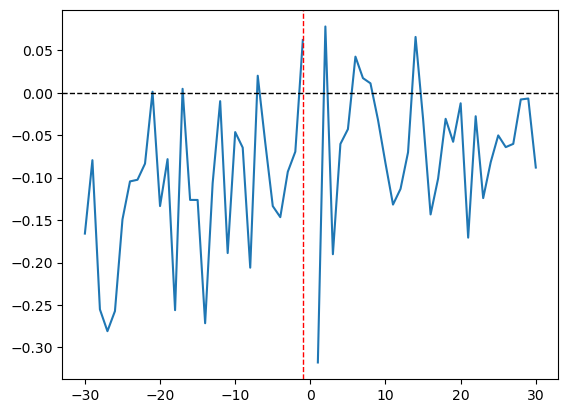

In [192]:
import matplotlib.pyplot as plt

dt_2 = range(-30, 31)
res_2 = list(result.params[1:])
res_2.insert(30, np.nan)


plt.plot(dt_2, res_2)
plt.axhline(y=0, color='black', linewidth=1, linestyle='--')
plt.axvline(x=-1, color='r', linewidth=1, linestyle='--')

# 컨트롤 그룹과 트리트먼트 그룹의 차이

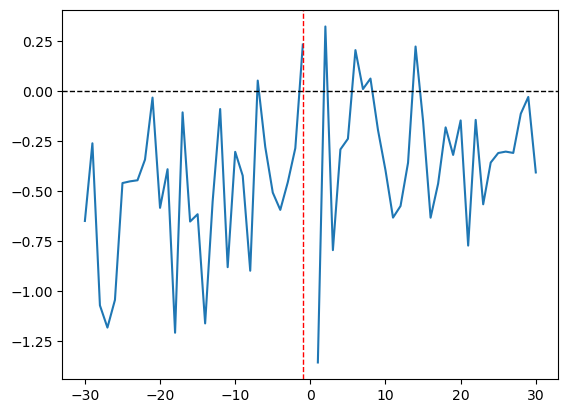

In [55]:
import matplotlib.pyplot as plt

dt_2 = range(-30, 31)
res_2 = list(result.params[1:])
res_2.insert(30, np.nan)


plt.plot(dt_2, res_2)
plt.axhline(y=0, color='black', linewidth=1, linestyle='--')
plt.axvline(x=-1, color='r', linewidth=1, linestyle='--')

# 컨트롤 그룹과 트리트먼트 그룹의 차이